# Install required libraries

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

# Set plot style
plt.style.use('seaborn-v0_8-dark')

## Load Data

In [3]:
# Assuming CSV is in Data/ directory as per previous setup
data_path = '../Data/proc_pima_2_withheader.csv'

df = pd.read_csv(data_path)

print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Diabetes        394 non-null    int64  
 1   times_pregnant  394 non-null    int64  
 2   glucose_conc    394 non-null    int64  
 3   Diastolic_BP    394 non-null    int64  
 4   Triceps_thk     394 non-null    int64  
 5   2_hr_insulin    394 non-null    int64  
 6   BMI             394 non-null    float64
 7   Pedigree        394 non-null    float64
 8   Age             394 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 27.8 KB
None

First 5 Rows:
   Diabetes  times_pregnant  glucose_conc  Diastolic_BP  Triceps_thk  \
0         1               6           148            72           35   
1        -1               1            89            66           23   
2         1               0           137            40           35   
3         1               3 

## Exploratory Data Analysis (EDA)

### Summary statistics

In [4]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
         Diabetes  times_pregnant  glucose_conc  Diastolic_BP  Triceps_thk  \
count  394.000000      394.000000    394.000000    394.000000   394.000000   
mean    -0.335025        3.302030    122.380711     70.675127    29.137056   
std      0.943407        3.208235     31.422626     12.465567    10.503919   
min     -1.000000        0.000000      0.000000     24.000000     7.000000   
25%     -1.000000        1.000000     99.000000     62.000000    21.000000   
50%     -1.000000        2.000000    119.000000     70.000000    29.000000   
75%      1.000000        5.000000    143.000000     78.000000    36.750000   
max      1.000000       17.000000    198.000000    110.000000    63.000000   

       2_hr_insulin         BMI    Pedigree         Age  
count    394.000000  394.000000  394.000000  394.000000  
mean     155.322335   33.073858    0.522741   30.888325  
std      118.987181    7.015055    0.344833   10.232549  
min        0.000000   18.200000    0.085000  

## Fix target column

df['Diabetes'] = df['Diabetes'].replace(-1, 0)
print(df['Diabetes'].value_counts())

### Check for missing values

In [7]:
print(df.isnull().sum())

zero_cols = ["glucose_conc", "Diastolic_BP", "Triceps_thk", "2_hr_insulin", "BMI"]
for col in zero_cols:
    print(f"{col}: {(df[col] == 0).sum()} zeros")

print(df.describe())

Diabetes          0
times_pregnant    0
glucose_conc      0
Diastolic_BP      0
Triceps_thk       0
2_hr_insulin      0
BMI               0
Pedigree          0
Age               0
dtype: int64
glucose_conc: 1 zeros
Diastolic_BP: 0 zeros
Triceps_thk: 0 zeros
2_hr_insulin: 1 zeros
BMI: 0 zeros
         Diabetes  times_pregnant  glucose_conc  Diastolic_BP  Triceps_thk  \
count  394.000000      394.000000    394.000000    394.000000   394.000000   
mean    -0.335025        3.302030    122.380711     70.675127    29.137056   
std      0.943407        3.208235     31.422626     12.465567    10.503919   
min     -1.000000        0.000000      0.000000     24.000000     7.000000   
25%     -1.000000        1.000000     99.000000     62.000000    21.000000   
50%     -1.000000        2.000000    119.000000     70.000000    29.000000   
75%      1.000000        5.000000    143.000000     78.000000    36.750000   
max      1.000000       17.000000    198.000000    110.000000    63.000000   

    

### Visualizations

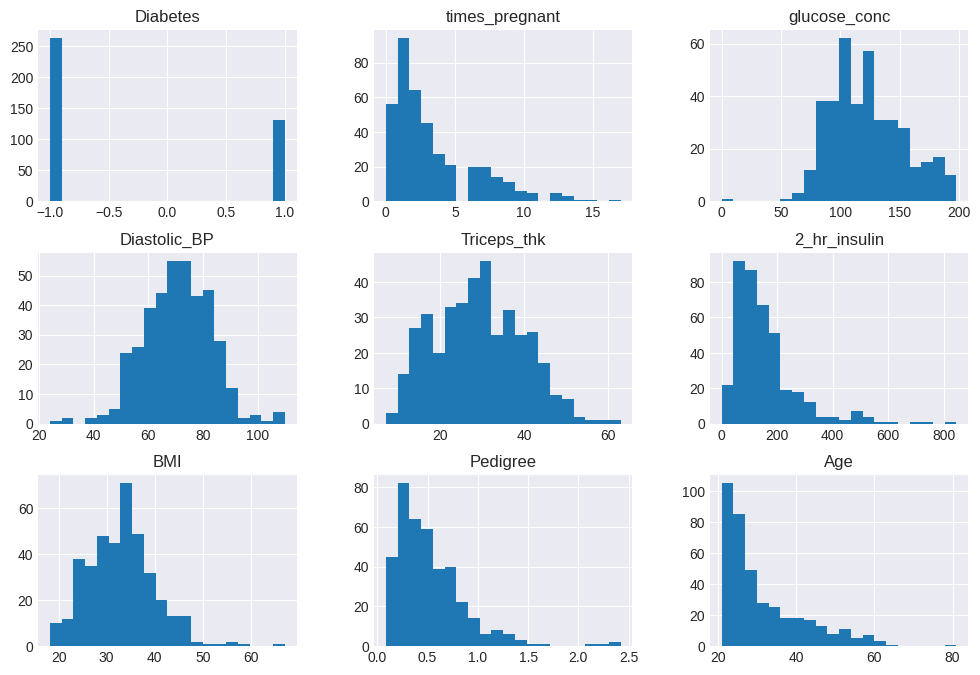

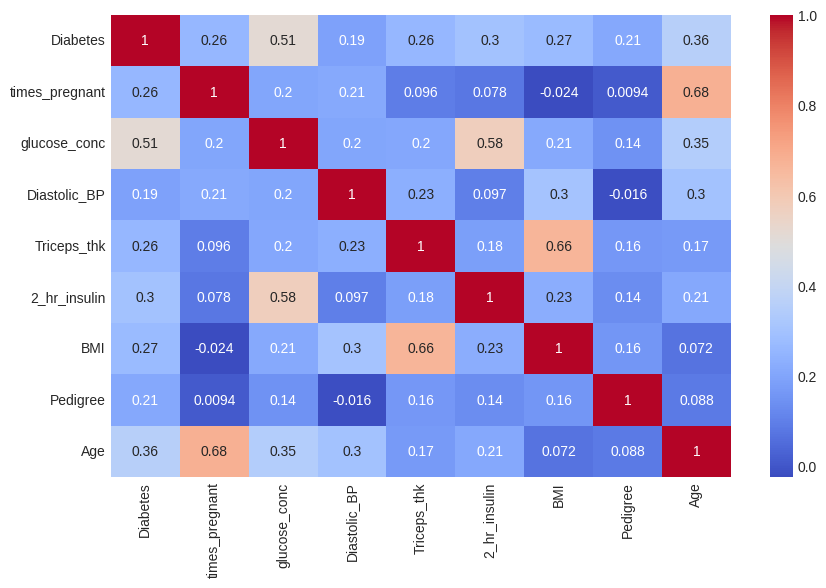

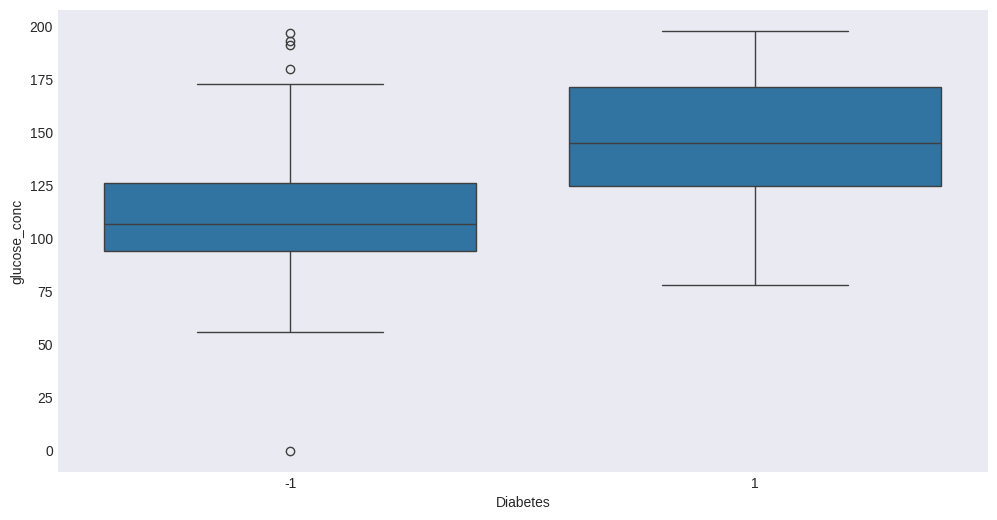

In [8]:
df.hist(bins=20, figsize=(12,8))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Boxplots by target
plt.figure(figsize=(12,6))
sns.boxplot(x="Diabetes", y="glucose_conc", data=df)
plt.show()

## Preprocessing

### Feature Scaling

In [16]:
# Split features and target
X = df.drop("Diabetes", axis=1)
y = df["Diabetes"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

### Feature engineering

In [17]:
# Add Age group
df['Age_group'] = pd.cut(df['Age'], bins=[0,30,50,100], labels=['Young','Middle','Old'])

# One-hot encode Age_group
df = pd.get_dummies(df, columns=['Age_group'], drop_first=True)

### Encode categorical variables

In [18]:
final_df = pd.concat([X_scaled, y], axis=1)

### Display processed data

In [19]:
print("\nProcessed Data (First 5 Rows):")
print(X_scaled.head())


Processed Data (First 5 Rows):
   times_pregnant  glucose_conc  Diastolic_BP  Triceps_thk  2_hr_insulin  \
0        0.842021      0.816350      0.106418     0.558877     -1.307030   
1       -0.718450     -1.063665     -0.375520    -0.585006     -0.516025   
2       -1.030545      0.465839     -2.463917     0.558877      0.106682   
3       -0.094262     -1.414176     -1.660688     0.272906     -0.566514   
4       -0.406356      2.377719     -0.054228     1.512113      3.262289   

        BMI  Pedigree       Age  Age_group_Middle  Age_group_Old  
0  0.075097  0.302731  1.870108          1.538675      -0.276591  
1 -0.709928 -1.032945 -0.967589         -0.649910      -0.276591  
2  1.431049  5.125682  0.206631          1.538675      -0.276591  
3 -0.296005 -0.797750 -0.478330         -0.649910      -0.276591  
4 -0.367371 -1.059078  2.163663         -0.649910       3.615443  


## Save Preprocessed Data

In [20]:
final_df = pd.DataFrame(X_scaled, columns=X.columns)
final_df["Diabetes"] = y

output_path = '../Data/proc_pima_2_withheader.csv_preprocessed.csv'
final_df.to_csv(output_path, index=False)   # ✅ save final_df, not X_scaled
print(f"Preprocessed data saved to: {output_path}")


# Verify file exists
if os.path.exists(output_path):
    print(f"File successfully created at: {output_path}")
else:
    print("Error: File not saved.")

Preprocessed data saved to: ../Data/proc_pima_2_withheader.csv_preprocessed.csv
File successfully created at: ../Data/proc_pima_2_withheader.csv_preprocessed.csv
